<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Features-Engeneering-and-Selection" data-toc-modified-id="Features-Engeneering-and-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Features Engeneering and Selection</a></span><ul class="toc-item"><li><span><a href="#Split-the-Data" data-toc-modified-id="Split-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Split the Data</a></span><ul class="toc-item"><li><span><a href="#Target-Encoding" data-toc-modified-id="Target-Encoding-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Target Encoding</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Models-For-Regression" data-toc-modified-id="Models-For-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Models For Regression</a></span><ul class="toc-item"><li><span><a href="#Linear-Models" data-toc-modified-id="Linear-Models-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Linear Models</a></span></li><li><span><a href="#Tree-Based-Model" data-toc-modified-id="Tree-Based-Model-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Tree Based Model</a></span></li><li><span><a href="#Ensemble-Models" data-toc-modified-id="Ensemble-Models-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Ensemble Models</a></span></li><li><span><a href="#Tuninig-Lgb-model" data-toc-modified-id="Tuninig-Lgb-model-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Tuninig Lgb model</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


pd.plotting.register_matplotlib_converters()
%matplotlib inline
from IPython.display import display
from itertools import combinations
from collections import Counter


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# pre_preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler , MinMaxScaler , RobustScaler


# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Valdiation
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold , GroupKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.metrics import r2_score , median_absolute_error , mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#display all column of df 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
# to format the scientific presntastion of numbers 
pd.options.display.float_format = '{:.2f}'.format


# Features Engeneering and Selection

In [30]:
df_clean = pd.read_csv('Clean_data.csv')

In [31]:
df_clean.hea()

((180031, 22), (180052, 22))

## Split the Data

In [5]:
train , test , y_train , y_test = train_test_split(df_clean.drop('sales',axis=1),df_clean.sales ,
                                                   test_size=0.30, shuffle=True,random_state=45)

In [6]:
train.shape,test.shape

((126021, 21), (54010, 21))

In [7]:
# The delay in orders
for df in [train,test]:
    
    df['DelayOrdered'] = df['days_for_shipment_(scheduled)'] - df['days_for_shipping_(real)']
    df.drop(['days_for_shipment_(scheduled)','days_for_shipping_(real)'], axis=1, inplace=True)



train['DiscountPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['order_item_discount'].max()))
test['DiscountPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['order_item_discount'].max()))


train['DenefitPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['benefit_per_order'].mean()))
test['DenefitPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['benefit_per_order'].mean()))


train['TotalDiscountPerProduct'] = train['product_name'].map(dict(train.groupby('product_name')['order_item_discount'].var()))
test['TotalDiscountPerProduct'] = test['product_name'].map(dict(test.groupby('product_name')['order_item_discount'].var()))


# Example 2: Compute the standard deviation of discounts per product
train['MaxDiscountPerOrder'] = train['order_item_id'].map(dict(train.groupby('order_item_id')['order_item_discount'].max()))
test['MaxDiscountPerOrder'] = test['order_item_id'].map(dict(test.groupby('order_item_id')['order_item_discount'].max()))

In [8]:
train.drop(['order_item_discount','benefit_per_order','order_item_profit_ratio'],axis=1,inplace=True)
test.drop(['order_item_discount','benefit_per_order','order_item_profit_ratio'],axis=1,inplace=True)

In [9]:
train.drop(['product_category_id','customer_id','order_item_id','order_id'],axis=1,inplace=True)
test.drop(['product_category_id','customer_id','order_item_id','order_id'],axis=1,inplace=True)

### Target Encoding

`Target encoding is a feature engineering technique used to handle categorical variables by encoding them based on the target variable. Instead of assigning arbitrary numerical values to categories (like in label encoding) or creating additional features (like in one-hot encoding), target encoding uses the mean of the target variable for each category as the encoded value.`

In [10]:
colms = ['product_name']
from category_encoders import TargetEncoder
Te = TargetEncoder()
for col in colms:
    train[f"{col}_mean"] = Te.fit_transform(train[f"{col}"], y_train)
    test[f"{col}_mean"] = Te.transform(test[f"{col}"])
    
    train.drop(col , axis=1, inplace=True)
    test.drop(col , axis=1, inplace=True)    

In [11]:
train['product_name_mean'].corr(y_train)

0.8377665307298386

In [12]:
cat = train.select_dtypes(include="O").columns.to_list()
num = train.select_dtypes(exclude='O').columns.to_list()

In [13]:
train.head()

,type,delivery_status,customer_country,customer_segment,market,order_item_discount_rate,order_item_product_price,order_item_quantity,shipping_mode,Month_order_date_(dateorders),Year_order_date_(dateorders),DelayOrdered,DiscountPerProduct,DenefitPerProduct,TotalDiscountPerProduct,MaxDiscountPerOrder,product_name_mean
94431,PAYMENT,Shipping on time,EE. UU.,Corporate,USCA,0.16,399.98,1,Same Day,7,2016,0,100.00,43.83,792.81,64.00,399.98
8215,PAYMENT,Late delivery,EE. UU.,Consumer,LATAM,0.02,50.00,5,Standard Class,2,2015,-2,62.50,16.47,187.75,5.00,149.83
139964,DEBIT,Late delivery,Puerto Rico,Home Office,LATAM,0.15,299.98,1,Standard Class,3,2017,-2,75.00,31.67,449.18,45.00,299.98
163277,DEBIT,Late delivery,EE. UU.,Consumer,Europe,0.15,299.98,1,Standard Class,8,2017,-1,75.00,31.67,449.18,45.00,299.98
102864,DEBIT,Shipping on time,EE. UU.,Consumer,USCA,0.03,50.00,1,Standard Class,8,2016,0,62.50,16.47,187.75,1.50,149.83


# Modeling

## Preprocessing

In [15]:
def Preprcessing(data,numerical_col,cat_clo,lable_encode = False):
    
    if lable_encode:
        le = LabelEncoder()
        for fea in cat:
            train[fea] = le.fit_transform(train[fea])
            test[fea] = le.transform(test[fea])

        Transformer = ColumnTransformer(
        
            transformers = [ 
        
        
            ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), numerical_col)]
            
            ,verbose_feature_names_out=False )

        data = pd.DataFrame(Transformer.fit_transform(data),columns=Transformer.get_feature_names_out())
        
        return data
    else:
        
        Transformer = ColumnTransformer(
        
            transformers = [ 
        
        
            ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), numerical_col),
        
            ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat_clo)
        ],verbose_feature_names_out=False)

        data = pd.DataFrame(Transformer.fit_transform(data),columns=Transformer.get_feature_names_out())
        
        return data  

In [16]:
train_df = Preprcessing(train,numerical_col=num,cat_clo=cat,lable_encode=True)

## Models For Regression

### Linear Models

1. Linear Reggression(OLS)
2. Ridge Reggression(L1 norm)
3. Lasso Reggression(L2 norm)
4. Elistic Net

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,PolynomialFeatures
from imblearn.pipeline import Pipeline

Linear_models = {
    
    "Linear Regression" : LinearRegression(),
    "Rideg" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet": ElasticNet()
}

# Linear_processer = ColumnTransformer(
    
    
#     transformers = [ 
    
    
#         ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num),
    
#         ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat)
        
    
#                                                                                 ])

# Evaluate Each Model
for name, model in Linear_models.items():
    
    # Create Pipeline
    
    pipeline = Pipeline(steps=[

        ("model", model)
    ])

  
    
    # Cross-Validation
    scores = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="neg_mean_squared_error")
    
    scores2 = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="neg_mean_absolute_error")
    
    scores3 = cross_val_score(pipeline, train_df, y_train, cv=5, scoring="r2")
    
    rmse_scores = np.sqrt(-scores)
    
    MAE_scores = np.sqrt(-scores2)
    
    R2_score = np.mean(scores3)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    
    print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
    
    print(f"Cross-Validation R2_score : {R2_score:.3f}\n")


Model: Linear Regression
Cross-Validation RMSE: 26.69 (+/- 0.20)
Cross-Validation MAE: 4.29 (+/- 0.01)
Cross-Validation R2_score : 0.946

Model: Rideg
Cross-Validation RMSE: 26.69 (+/- 0.20)
Cross-Validation MAE: 4.29 (+/- 0.01)
Cross-Validation R2_score : 0.946

Model: Lasso
Cross-Validation RMSE: 26.99 (+/- 0.18)
Cross-Validation MAE: 4.31 (+/- 0.01)
Cross-Validation R2_score : 0.944

Model: ElasticNet
Cross-Validation RMSE: 42.55 (+/- 0.15)
Cross-Validation MAE: 5.62 (+/- 0.01)
Cross-Validation R2_score : 0.862



### Tree Based Model

1. Decision Tree
2. Gradint Boosting  
3. Extra Trees


        I's Known that most of the tree models were likely to overfit without any tunnig so here we adjust some parameters for meaningful results

In [31]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,StackingRegressor,ExtraTreesRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


tree_models = {
    
    "LightGBM": LGBMRegressor(n_estimators = 200, random_state = 45, learning_rate = 0.01 ),
    
    "Decision Tree": DecisionTreeRegressor(random_state=45,max_depth=5)
    
}

tree_processer = ColumnTransformer(transformers=[
    
    
        ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num)
    
        # ('cat',Pipeline(steps=[('one_hot',OneHotEncoder(drop='first'))]),cat) 
        ])

# Evaluate Each Model
for name, model in tree_models.items():
    
    # Create Pipeline
    pipeline = Pipeline(steps=[
        
        ("Processre" , tree_processer ),
                
        ("model", model)
    ])
    
    # Cross-Validation
    scores = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_squared_error")
    
    scores2 = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_absolute_error")
    
    scores3 = cross_val_score(pipeline, train, y_train, cv=5, scoring="r2")
    
    rmse_scores = np.sqrt(-scores)
    
    MAE_scores = np.sqrt(-scores2)
    
    R2_score = np.mean(scores3)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
    print(f"Cross-Validation R2_score : {R2_score:.3f}\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 100816, number of used features: 11
[LightGBM] [Info] Start training from score 200.341686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 100817, number of used features: 11
[LightGBM] [Info] Start training from score 200.463444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

15.59 (+/- 0.08)
Cross-Validation MAE: 3.52 (+/- 0.01)
Cross-Validation R2_score : 0.981

Model: Decision Tree
Cross-Validation RMSE: 18.06 (+/- 0.14)
Cross-Validation MAE: 3.15 (+/- 0.01)
Cross-Validation R2_score : 0.975


### Ensemble Models

1. Stacking

In [ ]:
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,StackingRegressor
from sklearn.svm import SVR


estimators = [
    
    ('lr', LinearRegression()),
    ('lgbm',  DecisionTreeRegressor(random_state=45,max_depth=5))]

StackModels = StackingRegressor(
    
    estimators=estimators,
    
    final_estimator= Lasso() 
)

pipeline = Pipeline(steps=[
    
    ('preprocessor', tree_processer),
    
    ("Model", StackModels)
])


# Cross-Validation
scores = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_squared_error")
    
scores2 = cross_val_score(pipeline, train, y_train, cv=5, scoring="neg_mean_absolute_error")
    
scores3 = cross_val_score(pipeline, train, y_train, cv=5, scoring="r2")
    
rmse_scores = np.sqrt(-scores)
    
MAE_scores = np.sqrt(-scores2)
    
R2_score = np.mean(scores3)
    

print(f"Model: StackModels")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
print(f"Cross-Validation MAE: {MAE_scores.mean():.2f} (+/- {MAE_scores.std():.2f})")
print(f"Cross-Validation R2_score : {R2_score:.3f}\n")

Model: StackModels
Cross-Validation RMSE: 15.04 (+/- 0.14)
Cross-Validation MAE: 3.31 (+/- 0.01)
Cross-Validation R2_score : 0.983



**The above Resultes shows that the problem could have different solutions. Alought we gonna choose the LIGHT GBM Model since it's fast and good with momery and deployed**

# Hyperparameter Tunning

In [191]:
# Split the training data to train and validation
X_train , X_valid , train_y , valid_y = train_test_split(train , y_train, test_size=0.25 ,shuffle=True, random_state = 42)

X_train = Preprcessing(X_train,num,cat,lable_encode=True)
X_valid =  Preprcessing(X_valid,num,cat,lable_encode=True)


### Halving Gride Search

In [1]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingRandomSearchCV,HalvingGridSearchCV


# Model=  LGBMRegressor(random_state=45)

# # Define the parameter space
# param_dist = {
#     'learning_rate': [0.01],
#     'num_leaves': [31, 63, 127],
#     'max_depth': [5],
#     'min_child_samples': [10, 20, 50,100],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'n_estimators': [100, 200, 300],
#     'bagging_freq':[5],
#     'bagging_fraction':[0.75,0.85]
    
# }

# # Set up HalvingRandomSearchCV
# halving_search = HalvingRandomSearchCV(
#     estimator=Model,
#     param_distributions=param_dist,
#     resource='n_samples',
#     aggressive_elimination=True,
#     max_resources=400,  # Maximum number of estimators to test
#     random_state=42,
#     scoring='neg_root_mean_squared_error',  # Evaluation metric
#     cv=5,  # 5-fold cross-validation
#     verbose=1,  # Display progress
#     n_jobs=-1  # Parallelize
# )


# # Perform the search
# halving_search.fit(Train, y_train)

# #  Display the best parameters
# print("Best Parameters:", halving_search.best_params_)
# print("Best score:", halving_search.best_score_)

In [64]:
params = {'bagging_fraction': 0.5,
          'bagging_freq': 2,
          'colsample_bytree': 1.0, 
          'learning_rate': 0.01,
          'max_depth': 5,
          'min_child_samples': 10, 
          'n_estimators': 300,
          'num_leaves': 31}

### Optuna

In [146]:
import optuna
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation

dtrain = lgb.Dataset(X_train , label = train_y)
dvalid = lgb.Dataset(X_valid , label = valid_y)


# Define objective function
def objective(trial):
    # Define hyperparameter search space
    params = {
        "objective": "regression",
        "metric": "rmse",
        # "boosting_type":'dart',
        # 'drop_rate': trial.suggest_uniform("drop_rate",0.0001 , 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 10, 200),
        "max_depth": trial.suggest_int("max_depth", 1, 5),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        # "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        # "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),  # Include bagging_fraction
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
    }
        
    # Train LightGBM model
    model = lgb.train(params,
                train_set=dtrain,
               num_boost_round=200,
               valid_sets=[dtrain, dvalid],
        callbacks=[early_stopping(100), log_evaluation(100)],
               )

    # Predict and calculate RMSE
    preds = model.predict(X_valid)
    rmse = mean_squared_error(valid_y, preds, squared=False)
    return rmse

# Create a study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Get the best parameters
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2025-01-23 16:14:17,761] A new study created in memory with name: no-name-a12ae64f-c0b9-4e34-86fc-4bfd1c338cf0


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 94515, number of used features: 27
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] Found whitespace in feature_names, repla

[I 2025-01-23 16:14:20,590] Trial 0 finished with value: 17.581534805244136 and parameters: {'num_leaves': 27, 'max_depth': 2, 'learning_rate': 0.01585013656288544, 'n_estimators': 399, 'colsample_bytree': 0.6604077442432621, 'feature_fraction': 0.5766333135299668, 'bagging_fraction': 0.5550921786625123, 'bagging_freq': 5, 'reg_alpha': 1.8218049657661737, 'reg_lambda': 3.085512480419465e-05}. Best is trial 0 with value: 17.581534805244136.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8844610939465569, colsample_bytree=0.6060318964801743 will be ignored. Current value: feature_fraction=0.8844610939465569
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8844610939465569, colsample_bytree=0.6060318964801743 will be ignored. Current value: feature_fraction=0.8844610939465569
[LightGBM] [Warning] feature_fraction is set=0.8844610939465569, colsample_bytree=0.6060318964801743 will be ignored. Current value: feature_fraction=0.8844610939465569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021138 seconds.
You can set `force_col_wise=true` to remove the ove

[I 2025-01-23 16:14:21,779] Trial 1 finished with value: 108.61040204737895 and parameters: {'num_leaves': 101, 'max_depth': 2, 'learning_rate': 0.00041865993712004735, 'n_estimators': 167, 'colsample_bytree': 0.6060318964801743, 'feature_fraction': 0.8844610939465569, 'bagging_fraction': 0.5759067640340425, 'bagging_freq': 1, 'reg_alpha': 0.0006896554331647832, 'reg_lambda': 0.9679377429740438}. Best is trial 0 with value: 17.581534805244136.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[167]	training's rmse: 109.048	valid_1's rmse: 108.61
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5750165969337284, colsample_bytree=0.545935966419465 will be ignored. Current value: feature_fraction=0.5750165969337284
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ig

[I 2025-01-23 16:14:24,050] Trial 2 finished with value: 103.24133043624181 and parameters: {'num_leaves': 163, 'max_depth': 5, 'learning_rate': 0.0007293430052651221, 'n_estimators': 154, 'colsample_bytree': 0.545935966419465, 'feature_fraction': 0.5750165969337284, 'bagging_fraction': 0.9948255129245999, 'bagging_freq': 8, 'reg_alpha': 2.686370277118526e-08, 'reg_lambda': 0.06438120223023067}. Best is trial 0 with value: 17.581534805244136.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8984347664100713, colsample_bytree=0.8547271495658112 will be ignored. Current value: feature_fraction=0.8984347664100713
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8984347664100713, colsample_bytree=0.8547271495658112 will be ignored. Current value: feature_fraction=0.8984347664100713
[LightGBM] [Warning] feature_fraction is set=0.8984347664100713, colsample_bytree=0.8547271495658112 will be ignored. Current value: feature_fraction=0.8984347664100713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:25,505] Trial 3 finished with value: 3.74056387991811 and parameters: {'num_leaves': 64, 'max_depth': 5, 'learning_rate': 0.07069840370458388, 'n_estimators': 99, 'colsample_bytree': 0.8547271495658112, 'feature_fraction': 0.8984347664100713, 'bagging_fraction': 0.9640275602742624, 'bagging_freq': 6, 'reg_alpha': 1.2054500504569427e-08, 'reg_lambda': 0.020342765827849503}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[78]	training's rmse: 1.836	valid_1's rmse: 3.74056
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5119162346732761, colsample_bytree=0.8446371565317095 will be ignored. Current value: feature_fraction=0.5119162346732761
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5119162346732761, colsample_bytree=0.844637156

[I 2025-01-23 16:14:27,678] Trial 4 finished with value: 109.22452671428094 and parameters: {'num_leaves': 72, 'max_depth': 2, 'learning_rate': 0.00019360193873912152, 'n_estimators': 336, 'colsample_bytree': 0.8446371565317095, 'feature_fraction': 0.5119162346732761, 'bagging_fraction': 0.6949833296824799, 'bagging_freq': 7, 'reg_alpha': 0.07323663649687387, 'reg_lambda': 0.5274698668139831}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5930860873984158, colsample_bytree=0.7316560263034716 will be ignored. Current value: feature_fraction=0.5930860873984158
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5930860873984158, colsample_bytree=0.7316560263034716 will be ignored. Current value: feature_fraction=0.5930860873984158
[LightGBM] [Warning] feature_fraction is set=0.5930860873984158, colsample_bytree=0.7316560263034716 will be ignored. Current value: feature_fraction=0.5930860873984158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003099 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:31,965] Trial 5 finished with value: 23.334901897397117 and parameters: {'num_leaves': 123, 'max_depth': 4, 'learning_rate': 0.005132559117481294, 'n_estimators': 400, 'colsample_bytree': 0.7316560263034716, 'feature_fraction': 0.5930860873984158, 'bagging_fraction': 0.5564814971479042, 'bagging_freq': 4, 'reg_alpha': 3.808103139327689e-05, 'reg_lambda': 1.5574821092629536e-08}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6523953052799387, colsample_bytree=0.740074235536245 will be ignored. Current value: feature_fraction=0.6523953052799387
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6523953052799387, colsample_bytree=0.740074235536245 will be ignored. Current value: feature_fraction=0.6523953052799387
[LightGBM] [Warning] feature_fraction is set=0.6523953052799387, colsample_bytree=0.740074235536245 will be ignored. Current value: feature_fraction=0.6523953052799387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003546 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2025-01-23 16:14:33,799] Trial 6 finished with value: 78.14859709673424 and parameters: {'num_leaves': 185, 'max_depth': 2, 'learning_rate': 0.0037437352644476576, 'n_estimators': 168, 'colsample_bytree': 0.740074235536245, 'feature_fraction': 0.6523953052799387, 'bagging_fraction': 0.7368939215079142, 'bagging_freq': 10, 'reg_alpha': 1.2361067382359843e-05, 'reg_lambda': 0.00035409181759619724}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[168]	training's rmse: 78.3039	valid_1's rmse: 78.1486
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8621922393982384, colsample_bytree=0.5067504511157401 will be ignored. Current value: feature_fraction=0.8621922393982384
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8621922393982384, colsample_bytree=0.506750

[I 2025-01-23 16:14:34,528] Trial 7 finished with value: 100.09123809034567 and parameters: {'num_leaves': 60, 'max_depth': 2, 'learning_rate': 0.001633523123600866, 'n_estimators': 118, 'colsample_bytree': 0.5067504511157401, 'feature_fraction': 0.8621922393982384, 'bagging_fraction': 0.6282049319206995, 'bagging_freq': 5, 'reg_alpha': 1.3820837259017629, 'reg_lambda': 0.0007560533250270373}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8046335044435081, colsample_bytree=0.6985406220287431 will be ignored. Current value: feature_fraction=0.8046335044435081
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8046335044435081, colsample_bytree=0.6985406220287431 will be ignored. Current value: feature_fraction=0.8046335044435081
[LightGBM] [Warning] feature_fraction is set=0.8046335044435081, colsample_bytree=0.6985406220287431 will be ignored. Current value: feature_fraction=0.8046335044435081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:36,619] Trial 8 finished with value: 36.63551967015843 and parameters: {'num_leaves': 177, 'max_depth': 2, 'learning_rate': 0.008104473172478033, 'n_estimators': 315, 'colsample_bytree': 0.6985406220287431, 'feature_fraction': 0.8046335044435081, 'bagging_fraction': 0.856959397509413, 'bagging_freq': 9, 'reg_alpha': 0.40695802084487326, 'reg_lambda': 1.2628734141318467e-05}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7291133788726731, colsample_bytree=0.5063047136987173 will be ignored. Current value: feature_fraction=0.7291133788726731
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7291133788726731, colsample_bytree=0.5063047136987173 will be ignored. Current value: feature_fraction=0.7291133788726731
[LightGBM] [Warning] feature_fraction is set=0.7291133788726731, colsample_bytree=0.5063047136987173 will be ignored. Current value: feature_fraction=0.7291133788726731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007818 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:39,067] Trial 9 finished with value: 75.79105809917831 and parameters: {'num_leaves': 85, 'max_depth': 3, 'learning_rate': 0.0017829810665338894, 'n_estimators': 297, 'colsample_bytree': 0.5063047136987173, 'feature_fraction': 0.7291133788726731, 'bagging_fraction': 0.8459896013999305, 'bagging_freq': 7, 'reg_alpha': 0.012993937312802089, 'reg_lambda': 2.121686619803964e-08}. Best is trial 3 with value: 3.74056387991811.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9505597560719174, colsample_bytree=0.9781765520430907 will be ignored. Current value: feature_fraction=0.9505597560719174
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9505597560719174, colsample_bytree=0.9781765520430907 will be ignored. Current value: feature_fraction=0.9505597560719174
[LightGBM] [Warning] feature_fraction is set=0.9505597560719174, colsample_bytree=0.9781765520430907 will be ignored. Current value: feature_fraction=0.9505597560719174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002976 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:40,263] Trial 10 finished with value: 2.2751855263247096 and parameters: {'num_leaves': 24, 'max_depth': 5, 'learning_rate': 0.07708783898086707, 'n_estimators': 70, 'colsample_bytree': 0.9781765520430907, 'feature_fraction': 0.9505597560719174, 'bagging_fraction': 0.9929875868342963, 'bagging_freq': 2, 'reg_alpha': 3.997504298977612e-08, 'reg_lambda': 0.029307636096734944}. Best is trial 10 with value: 2.2751855263247096.


Did not meet early stopping. Best iteration is:
[70]	training's rmse: 1.74939	valid_1's rmse: 2.27519
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9807918113210001, colsample_bytree=0.9914780355295882 will be ignored. Current value: feature_fraction=0.9807918113210001
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9807918113210001, colsample_bytree=0.9914780355295882 will be ignored. Current value: feature_fraction=0.9807918113210001
[LightGBM] [Warning] feature_fraction is set=0.9807918113210001, colsample_bytree=0.9914780355295882 will be ignored. Current value: feature_fraction=0.9807918113210001
[LightGBM] [Info] Auto-choosing row-wise multi-thread

[I 2025-01-23 16:14:41,175] Trial 11 finished with value: 3.2139444090568983 and parameters: {'num_leaves': 19, 'max_depth': 5, 'learning_rate': 0.08913551021301372, 'n_estimators': 52, 'colsample_bytree': 0.9914780355295882, 'feature_fraction': 0.9807918113210001, 'bagging_fraction': 0.995491635503673, 'bagging_freq': 2, 'reg_alpha': 1.523576127031915e-08, 'reg_lambda': 0.021013112196485526}. Best is trial 10 with value: 2.2751855263247096.


Did not meet early stopping. Best iteration is:
[52]	training's rmse: 2.70904	valid_1's rmse: 3.21394
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9905717169581174, colsample_bytree=0.9971569310820624 will be ignored. Current value: feature_fraction=0.9905717169581174
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9905717169581174, colsample_bytree=0.9971569310820624 will be ignored. Current value: feature_fraction=0.9905717169581174
[LightGBM] [Warning] feature_fraction is set=0.9905717169581174, colsample_bytree=0.9971569310820624 will be ignored. Current value: feature_fraction=0.9905717169581174
[LightGBM] [Info] Auto-choosing col-wise multi-thread

[I 2025-01-23 16:14:43,114] Trial 12 finished with value: 3.936129016740796 and parameters: {'num_leaves': 15, 'max_depth': 4, 'learning_rate': 0.08816527413917909, 'n_estimators': 50, 'colsample_bytree': 0.9971569310820624, 'feature_fraction': 0.9905717169581174, 'bagging_fraction': 0.8971160854891206, 'bagging_freq': 1, 'reg_alpha': 6.674414515434798e-07, 'reg_lambda': 0.013346507050841169}. Best is trial 10 with value: 2.2751855263247096.


Did not meet early stopping. Best iteration is:
[50]	training's rmse: 3.38077	valid_1's rmse: 3.93613
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9735548208465703, colsample_bytree=0.994699511097473 will be ignored. Current value: feature_fraction=0.9735548208465703
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9735548208465703, colsample_bytree=0.994699511097473 will be ignored. Current value: feature_fraction=0.9735548208465703
[LightGBM] [Warning] feature_fraction is set=0.9735548208465703, colsample_bytree=0.994699511097473 will be ignored. Current value: feature_fraction=0.9735548208465703
[LightGBM] [Info] Auto-choosing row-wise multi-threading

[I 2025-01-23 16:14:44,937] Trial 13 finished with value: 18.118100626079173 and parameters: {'num_leaves': 34, 'max_depth': 4, 'learning_rate': 0.035271210918527335, 'n_estimators': 60, 'colsample_bytree': 0.994699511097473, 'feature_fraction': 0.9735548208465703, 'bagging_fraction': 0.9383774160757439, 'bagging_freq': 3, 'reg_alpha': 3.6963789044974833e-07, 'reg_lambda': 4.1423790268301675}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9408625228086755, colsample_bytree=0.9053621112263595 will be ignored. Current value: feature_fraction=0.9408625228086755
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9408625228086755, colsample_bytree=0.9053621112263595 will be ignored. Current value: feature_fraction=0.9408625228086755
[LightGBM] [Warning] feature_fraction is set=0.9408625228086755, colsample_bytree=0.9053621112263595 will be ignored. Current value: feature_fraction=0.9408625228086755
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008591 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:50,270] Trial 14 finished with value: 2.3370090521677334 and parameters: {'num_leaves': 40, 'max_depth': 5, 'learning_rate': 0.025071228615788862, 'n_estimators': 231, 'colsample_bytree': 0.9053621112263595, 'feature_fraction': 0.9408625228086755, 'bagging_fraction': 0.8093274368363745, 'bagging_freq': 3, 'reg_alpha': 2.1008113292236908e-07, 'reg_lambda': 0.005390619557061702}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7688032862944889, colsample_bytree=0.8942900485795127 will be ignored. Current value: feature_fraction=0.7688032862944889
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7688032862944889, colsample_bytree=0.8942900485795127 will be ignored. Current value: feature_fraction=0.7688032862944889
[LightGBM] [Warning] feature_fraction is set=0.7688032862944889, colsample_bytree=0.8942900485795127 will be ignored. Current value: feature_fraction=0.7688032862944889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002831 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:53,559] Trial 15 finished with value: 6.061204935428799 and parameters: {'num_leaves': 46, 'max_depth': 4, 'learning_rate': 0.02298285341187206, 'n_estimators': 244, 'colsample_bytree': 0.8942900485795127, 'feature_fraction': 0.7688032862944889, 'bagging_fraction': 0.8116354422613323, 'bagging_freq': 3, 'reg_alpha': 6.061630155123856e-07, 'reg_lambda': 1.807636563274082e-06}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9379544437182041, colsample_bytree=0.9201726679016947 will be ignored. Current value: feature_fraction=0.9379544437182041
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9379544437182041, colsample_bytree=0.9201726679016947 will be ignored. Current value: feature_fraction=0.9379544437182041
[LightGBM] [Warning] feature_fraction is set=0.9379544437182041, colsample_bytree=0.9201726679016947 will be ignored. Current value: feature_fraction=0.9379544437182041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005228 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:14:56,316] Trial 16 finished with value: 60.18573599931825 and parameters: {'num_leaves': 130, 'max_depth': 1, 'learning_rate': 0.011678912826045476, 'n_estimators': 223, 'colsample_bytree': 0.9201726679016947, 'feature_fraction': 0.9379544437182041, 'bagging_fraction': 0.7712771497421694, 'bagging_freq': 3, 'reg_alpha': 8.337360139059193e-06, 'reg_lambda': 0.0022864272205410235}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[223]	training's rmse: 60.2601	valid_1's rmse: 60.18

[I 2025-01-23 16:15:01,334] Trial 17 finished with value: 5.253889896774529 and parameters: {'num_leaves': 48, 'max_depth': 5, 'learning_rate': 0.03272343385460823, 'n_estimators': 224, 'colsample_bytree': 0.8061316274868927, 'feature_fraction': 0.8249749852918986, 'bagging_fraction': 0.6895607570326828, 'bagging_freq': 2, 'reg_alpha': 0.000599634264506342, 'reg_lambda': 0.196967406286807}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7127364676219992, colsample_bytree=0.9338543312705934 will be ignored. Current value: feature_fraction=0.7127364676219992
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7127364676219992, colsample_bytree=0.9338543312705934 will be ignored. Current value: feature_fraction=0.7127364676219992
[LightGBM] [Warning] feature_fraction is set=0.7127364676219992, colsample_bytree=0.9338543312705934 will be ignored. Current value: feature_fraction=0.7127364676219992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006137 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:05,641] Trial 18 finished with value: 10.072296139139956 and parameters: {'num_leaves': 98, 'max_depth': 3, 'learning_rate': 0.030052100723061817, 'n_estimators': 261, 'colsample_bytree': 0.9338543312705934, 'feature_fraction': 0.7127364676219992, 'bagging_fraction': 0.9053017797246972, 'bagging_freq': 4, 'reg_alpha': 1.260320708096716e-07, 'reg_lambda': 3.4796332717253e-05}. Best is trial 10 with value: 2.2751855263247096.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.934914901145026, colsample_bytree=0.7959754525661736 will be ignored. Current value: feature_fraction=0.934914901145026
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.934914901145026, colsample_bytree=0.7959754525661736 will be ignored. Current value: feature_fraction=0.934914901145026
[LightGBM] [Warning] feature_fraction is set=0.934914901145026, colsample_bytree=0.7959754525661736 will be ignored. Current value: feature_fraction=0.934914901145026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014109 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2025-01-23 16:15:13,014] Trial 19 finished with value: 1.401860326673886 and parameters: {'num_leaves': 43, 'max_depth': 5, 'learning_rate': 0.0490246128778572, 'n_estimators': 210, 'colsample_bytree': 0.7959754525661736, 'feature_fraction': 0.934914901145026, 'bagging_fraction': 0.7870542357729087, 'bagging_freq': 2, 'reg_alpha': 5.895947062773945e-06, 'reg_lambda': 8.664450587419479}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8405247083234543, colsample_bytree=0.8068818370037485 will be ignored. Current value: feature_fraction=0.8405247083234543
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8405247083234543, colsample_bytree=0.8068818370037485 will be ignored. Current value: feature_fraction=0.8405247083234543
[LightGBM] [Warning] feature_fraction is set=0.8405247083234543, colsample_bytree=0.8068818370037485 will be ignored. Current value: feature_fraction=0.8405247083234543
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003156 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:15,627] Trial 20 finished with value: 3.8758536213718946 and parameters: {'num_leaves': 129, 'max_depth': 4, 'learning_rate': 0.05218901535992249, 'n_estimators': 110, 'colsample_bytree': 0.8068818370037485, 'feature_fraction': 0.8405247083234543, 'bagging_fraction': 0.6271607739945094, 'bagging_freq': 1, 'reg_alpha': 2.7924981348163633e-06, 'reg_lambda': 2.2886454649910366}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9284613077505967, colsample_bytree=0.9275432905382262 will be ignored. Current value: feature_fraction=0.9284613077505967
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9284613077505967, colsample_bytree=0.9275432905382262 will be ignored. Current value: feature_fraction=0.9284613077505967
[LightGBM] [Warning] feature_fraction is set=0.9284613077505967, colsample_bytree=0.9275432905382262 will be ignored. Current value: feature_fraction=0.9284613077505967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046701 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:21,225] Trial 21 finished with value: 2.7393217179567593 and parameters: {'num_leaves': 11, 'max_depth': 5, 'learning_rate': 0.045676902000238224, 'n_estimators': 184, 'colsample_bytree': 0.9275432905382262, 'feature_fraction': 0.9284613077505967, 'bagging_fraction': 0.8027004076372856, 'bagging_freq': 2, 'reg_alpha': 3.699386748335735e-05, 'reg_lambda': 0.004793471678103882}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9206267583871204, colsample_bytree=0.794397069153986 will be ignored. Current value: feature_fraction=0.9206267583871204
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9206267583871204, colsample_bytree=0.794397069153986 will be ignored. Current value: feature_fraction=0.9206267583871204
[LightGBM] [Warning] feature_fraction is set=0.9206267583871204, colsample_bytree=0.794397069153986 will be ignored. Current value: feature_fraction=0.9206267583871204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009448 seconds.
You can set `force_row_wise=true` to remove the overhe

[I 2025-01-23 16:15:31,127] Trial 22 finished with value: 2.792509940038557 and parameters: {'num_leaves': 43, 'max_depth': 5, 'learning_rate': 0.015166793962569087, 'n_estimators': 293, 'colsample_bytree': 0.794397069153986, 'feature_fraction': 0.9206267583871204, 'bagging_fraction': 0.7409823587344759, 'bagging_freq': 4, 'reg_alpha': 1.045090351155169e-07, 'reg_lambda': 6.049565946367303}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8786611607978286, colsample_bytree=0.8652932121449786 will be ignored. Current value: feature_fraction=0.8786611607978286
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8786611607978286, colsample_bytree=0.8652932121449786 will be ignored. Current value: feature_fraction=0.8786611607978286
[LightGBM] [Warning] feature_fraction is set=0.8786611607978286, colsample_bytree=0.8652932121449786 will be ignored. Current value: feature_fraction=0.8786611607978286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002898 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:34,291] Trial 23 finished with value: 27.659392539770554 and parameters: {'num_leaves': 83, 'max_depth': 5, 'learning_rate': 0.0074681402182302835, 'n_estimators': 201, 'colsample_bytree': 0.8652932121449786, 'feature_fraction': 0.8786611607978286, 'bagging_fraction': 0.5011904977892214, 'bagging_freq': 2, 'reg_alpha': 1.2803739520900189e-06, 'reg_lambda': 0.09482812258568675}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9493775729678747, colsample_bytree=0.951045843777737 will be ignored. Current value: feature_fraction=0.9493775729678747
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9493775729678747, colsample_bytree=0.951045843777737 will be ignored. Current value: feature_fraction=0.9493775729678747
[LightGBM] [Warning] feature_fraction is set=0.9493775729678747, colsample_bytree=0.951045843777737 will be ignored. Current value: feature_fraction=0.9493775729678747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061649 seconds.
You can set `force_col_wise=true` to remove the overhe

[I 2025-01-23 16:15:36,857] Trial 24 finished with value: 10.096697678061437 and parameters: {'num_leaves': 32, 'max_depth': 4, 'learning_rate': 0.021048669217488682, 'n_estimators': 137, 'colsample_bytree': 0.951045843777737, 'feature_fraction': 0.9493775729678747, 'bagging_fraction': 0.8515998206292918, 'bagging_freq': 3, 'reg_alpha': 7.09514869363996e-08, 'reg_lambda': 9.714655935243112}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[137]	training's rmse: 10.1102	valid_1's rmse: 10.0967
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7815203315911308, colsample_bytree=0.8889210537325065 will be ignored. Current value: feature_fraction=0.7815203315911308
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.7815203315911308, colsample_bytree=0.8889210537325065 will be ignored. Current value: feature_fraction=0.7815203315911308
[LightGBM] [Warning] feature_fraction is set=0.7815203315911308, colsample_bytree=0.8889210537325065 will be ignored. Current value: feature_fract

[I 2025-01-23 16:15:40,425] Trial 25 finished with value: 5.948149063628777 and parameters: {'num_leaves': 56, 'max_depth': 5, 'learning_rate': 0.04813345555985566, 'n_estimators': 267, 'colsample_bytree': 0.8889210537325065, 'feature_fraction': 0.7815203315911308, 'bagging_fraction': 0.9067291825354385, 'bagging_freq': 1, 'reg_alpha': 0.00010398798168829381, 'reg_lambda': 0.0025203353995025537}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9563276175573021, colsample_bytree=0.9597623294874019 will be ignored. Current value: feature_fraction=0.9563276175573021
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9563276175573021, colsample_bytree=0.9597623294874019 will be ignored. Current value: feature_fraction=0.9563276175573021
[LightGBM] [Warning] feature_fraction is set=0.9563276175573021, colsample_bytree=0.9597623294874019 will be ignored. Current value: feature_fraction=0.9563276175573021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003055 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:43,948] Trial 26 finished with value: 3.0055245801975476 and parameters: {'num_leaves': 78, 'max_depth': 4, 'learning_rate': 0.09414237076631758, 'n_estimators': 202, 'colsample_bytree': 0.9597623294874019, 'feature_fraction': 0.9563276175573021, 'bagging_fraction': 0.6935462469628355, 'bagging_freq': 4, 'reg_alpha': 3.8133413072356336e-06, 'reg_lambda': 0.26006768453851686}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9180117291976543, colsample_bytree=0.7766259823602547 will be ignored. Current value: feature_fraction=0.9180117291976543
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9180117291976543, colsample_bytree=0.7766259823602547 will be ignored. Current value: feature_fraction=0.9180117291976543
[LightGBM] [Warning] feature_fraction is set=0.9180117291976543, colsample_bytree=0.7766259823602547 will be ignored. Current value: feature_fraction=0.9180117291976543
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004625 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:45,119] Trial 27 finished with value: 61.749796444173185 and parameters: {'num_leaves': 36, 'max_depth': 3, 'learning_rate': 0.009893771267698763, 'n_estimators': 81, 'colsample_bytree': 0.7766259823602547, 'feature_fraction': 0.9180117291976543, 'bagging_fraction': 0.7910841376668909, 'bagging_freq': 2, 'reg_alpha': 0.0032950234355250472, 'reg_lambda': 0.0001057924412721659}. Best is trial 19 with value: 1.401860326673886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[81]	training's rmse: 61.8993	valid_1's rmse: 61.7498
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fractio

[I 2025-01-23 16:15:51,834] Trial 28 finished with value: 0.9324165281641665 and parameters: {'num_leaves': 25, 'max_depth': 5, 'learning_rate': 0.05404300948532029, 'n_estimators': 350, 'colsample_bytree': 0.8257853983470647, 'feature_fraction': 0.9978766113422403, 'bagging_fraction': 0.8755579610117998, 'bagging_freq': 3, 'reg_alpha': 2.230605350885652e-07, 'reg_lambda': 3.0020264929662657e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9818290324155352, colsample_bytree=0.6421886686158835 will be ignored. Current value: feature_fraction=0.9818290324155352
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9818290324155352, colsample_bytree=0.6421886686158835 will be ignored. Current value: feature_fraction=0.9818290324155352
[LightGBM] [Warning] feature_fraction is set=0.9818290324155352, colsample_bytree=0.6421886686158835 will be ignored. Current value: feature_fraction=0.9818290324155352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003450 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:55,152] Trial 29 finished with value: 1.6083623363708037 and parameters: {'num_leaves': 24, 'max_depth': 3, 'learning_rate': 0.050292664568719454, 'n_estimators': 335, 'colsample_bytree': 0.6421886686158835, 'feature_fraction': 0.9818290324155352, 'bagging_fraction': 0.9509011228186183, 'bagging_freq': 5, 'reg_alpha': 3.875929248677782e-08, 'reg_lambda': 8.427285962501575e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8485085219848794, colsample_bytree=0.6270694868874706 will be ignored. Current value: feature_fraction=0.8485085219848794
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8485085219848794, colsample_bytree=0.6270694868874706 will be ignored. Current value: feature_fraction=0.8485085219848794
[LightGBM] [Warning] feature_fraction is set=0.8485085219848794, colsample_bytree=0.6270694868874706 will be ignored. Current value: feature_fraction=0.8485085219848794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002842 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:15:59,116] Trial 30 finished with value: 7.156828614413973 and parameters: {'num_leaves': 10, 'max_depth': 3, 'learning_rate': 0.0155457366882132, 'n_estimators': 369, 'colsample_bytree': 0.6270694868874706, 'feature_fraction': 0.8485085219848794, 'bagging_fraction': 0.9435053926441513, 'bagging_freq': 6, 'reg_alpha': 1.3272810094832533e-06, 'reg_lambda': 3.036305758197377e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9998078297695167, colsample_bytree=0.6684086504740653 will be ignored. Current value: feature_fraction=0.9998078297695167
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9998078297695167, colsample_bytree=0.6684086504740653 will be ignored. Current value: feature_fraction=0.9998078297695167
[LightGBM] [Warning] feature_fraction is set=0.9998078297695167, colsample_bytree=0.6684086504740653 will be ignored. Current value: feature_fraction=0.9998078297695167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045591 seconds.
You can set `force_col_wise=true` to remove the ove

[I 2025-01-23 16:16:03,763] Trial 31 finished with value: 1.5962341550700636 and parameters: {'num_leaves': 23, 'max_depth': 3, 'learning_rate': 0.05632341894311987, 'n_estimators': 370, 'colsample_bytree': 0.6684086504740653, 'feature_fraction': 0.9998078297695167, 'bagging_fraction': 0.9601809502075194, 'bagging_freq': 5, 'reg_alpha': 5.558312583916238e-08, 'reg_lambda': 6.083547935852878e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9940504503229984, colsample_bytree=0.6764162554565715 will be ignored. Current value: feature_fraction=0.9940504503229984
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9940504503229984, colsample_bytree=0.6764162554565715 will be ignored. Current value: feature_fraction=0.9940504503229984
[LightGBM] [Warning] feature_fraction is set=0.9940504503229984, colsample_bytree=0.6764162554565715 will be ignored. Current value: feature_fraction=0.9940504503229984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003085 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:07,314] Trial 32 finished with value: 1.8381328375724104 and parameters: {'num_leaves': 26, 'max_depth': 3, 'learning_rate': 0.052608266815765165, 'n_estimators': 367, 'colsample_bytree': 0.6764162554565715, 'feature_fraction': 0.9940504503229984, 'bagging_fraction': 0.8771662570340414, 'bagging_freq': 5, 'reg_alpha': 2.1195184279687115e-07, 'reg_lambda': 1.9363438984515085e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8979582310895654, colsample_bytree=0.6070059195603559 will be ignored. Current value: feature_fraction=0.8979582310895654
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8979582310895654, colsample_bytree=0.6070059195603559 will be ignored. Current value: feature_fraction=0.8979582310895654
[LightGBM] [Warning] feature_fraction is set=0.8979582310895654, colsample_bytree=0.6070059195603559 will be ignored. Current value: feature_fraction=0.8979582310895654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003606 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:11,045] Trial 33 finished with value: 3.1261053806851318 and parameters: {'num_leaves': 54, 'max_depth': 3, 'learning_rate': 0.041352422811090854, 'n_estimators': 366, 'colsample_bytree': 0.6070059195603559, 'feature_fraction': 0.8979582310895654, 'bagging_fraction': 0.9473912849282492, 'bagging_freq': 6, 'reg_alpha': 2.8306738227360265e-08, 'reg_lambda': 3.3633304973310197e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9971074744001405, colsample_bytree=0.6547074650855538 will be ignored. Current value: feature_fraction=0.9971074744001405
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9971074744001405, colsample_bytree=0.6547074650855538 will be ignored. Current value: feature_fraction=0.9971074744001405
[LightGBM] [Warning] feature_fraction is set=0.9971074744001405, colsample_bytree=0.6547074650855538 will be ignored. Current value: feature_fraction=0.9971074744001405
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:13,520] Trial 34 finished with value: 23.717260785921965 and parameters: {'num_leaves': 25, 'max_depth': 1, 'learning_rate': 0.0597349413242346, 'n_estimators': 338, 'colsample_bytree': 0.6547074650855538, 'feature_fraction': 0.9971074744001405, 'bagging_fraction': 0.9212057115964662, 'bagging_freq': 5, 'reg_alpha': 1.2304296407502496e-08, 'reg_lambda': 2.2502788319661977e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8999757097111373, colsample_bytree=0.5627362741268866 will be ignored. Current value: feature_fraction=0.8999757097111373
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8999757097111373, colsample_bytree=0.5627362741268866 will be ignored. Current value: feature_fraction=0.8999757097111373
[LightGBM] [Warning] feature_fraction is set=0.8999757097111373, colsample_bytree=0.5627362741268866 will be ignored. Current value: feature_fraction=0.8999757097111373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:17,407] Trial 35 finished with value: 105.25872506014245 and parameters: {'num_leaves': 70, 'max_depth': 3, 'learning_rate': 0.00027644152783055416, 'n_estimators': 346, 'colsample_bytree': 0.5627362741268866, 'feature_fraction': 0.8999757097111373, 'bagging_fraction': 0.965354784687438, 'bagging_freq': 7, 'reg_alpha': 6.862281281525612e-08, 'reg_lambda': 1.0829491886111035e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9690669446334885, colsample_bytree=0.7091721389935364 will be ignored. Current value: feature_fraction=0.9690669446334885
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9690669446334885, colsample_bytree=0.7091721389935364 will be ignored. Current value: feature_fraction=0.9690669446334885
[LightGBM] [Warning] feature_fraction is set=0.9690669446334885, colsample_bytree=0.7091721389935364 will be ignored. Current value: feature_fraction=0.9690669446334885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003812 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:20,613] Trial 36 finished with value: 110.54114492135331 and parameters: {'num_leaves': 111, 'max_depth': 3, 'learning_rate': 0.00011919129901685249, 'n_estimators': 310, 'colsample_bytree': 0.7091721389935364, 'feature_fraction': 0.9690669446334885, 'bagging_fraction': 0.8742108397082874, 'bagging_freq': 5, 'reg_alpha': 2.120029247987906e-05, 'reg_lambda': 8.63680822807086e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9965638934183395, colsample_bytree=0.7647284523499491 will be ignored. Current value: feature_fraction=0.9965638934183395
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9965638934183395, colsample_bytree=0.7647284523499491 will be ignored. Current value: feature_fraction=0.9965638934183395
[LightGBM] [Warning] feature_fraction is set=0.9965638934183395, colsample_bytree=0.7647284523499491 will be ignored. Current value: feature_fraction=0.9965638934183395
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003355 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:26,140] Trial 37 finished with value: 64.91226504542021 and parameters: {'num_leaves': 147, 'max_depth': 4, 'learning_rate': 0.0016295057706534695, 'n_estimators': 382, 'colsample_bytree': 0.7647284523499491, 'feature_fraction': 0.9965638934183395, 'bagging_fraction': 0.960315810206556, 'bagging_freq': 4, 'reg_alpha': 3.063581933264472e-06, 'reg_lambda': 4.748493498129519e-08}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6907499475868287, colsample_bytree=0.8418610322429759 will be ignored. Current value: feature_fraction=0.6907499475868287
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6907499475868287, colsample_bytree=0.8418610322429759 will be ignored. Current value: feature_fraction=0.6907499475868287
[LightGBM] [Warning] feature_fraction is set=0.6907499475868287, colsample_bytree=0.8418610322429759 will be ignored. Current value: feature_fraction=0.6907499475868287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002789 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:28,601] Trial 38 finished with value: 96.12329916404349 and parameters: {'num_leaves': 32, 'max_depth': 2, 'learning_rate': 0.0008056494413504327, 'n_estimators': 324, 'colsample_bytree': 0.8418610322429759, 'feature_fraction': 0.6907499475868287, 'bagging_fraction': 0.8266681037471043, 'bagging_freq': 5, 'reg_alpha': 0.00011139765824303329, 'reg_lambda': 8.781335053409407e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8751502950115804, colsample_bytree=0.6539014386355442 will be ignored. Current value: feature_fraction=0.8751502950115804
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.8751502950115804, colsample_bytree=0.6539014386355442 will be ignored. Current value: feature_fraction=0.8751502950115804
[LightGBM] [Warning] feature_fraction is set=0.8751502950115804, colsample_bytree=0.6539014386355442 will be ignored. Current value: feature_fraction=0.8751502950115804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003626 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:33,028] Trial 39 finished with value: 4.300738477019419 and parameters: {'num_leaves': 66, 'max_depth': 4, 'learning_rate': 0.01943399342677284, 'n_estimators': 388, 'colsample_bytree': 0.6539014386355442, 'feature_fraction': 0.8751502950115804, 'bagging_fraction': 0.7672303424556655, 'bagging_freq': 8, 'reg_alpha': 4.092815110485893e-07, 'reg_lambda': 5.329812158863886e-05}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5278751925955946, colsample_bytree=0.5704111177377426 will be ignored. Current value: feature_fraction=0.5278751925955946
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.5278751925955946, colsample_bytree=0.5704111177377426 will be ignored. Current value: feature_fraction=0.5278751925955946
[LightGBM] [Warning] feature_fraction is set=0.5278751925955946, colsample_bytree=0.5704111177377426 will be ignored. Current value: feature_fraction=0.5278751925955946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:36,300] Trial 40 finished with value: 12.420204022165008 and parameters: {'num_leaves': 198, 'max_depth': 2, 'learning_rate': 0.06464490441935955, 'n_estimators': 352, 'colsample_bytree': 0.5704111177377426, 'feature_fraction': 0.5278751925955946, 'bagging_fraction': 0.8752686878277629, 'bagging_freq': 6, 'reg_alpha': 5.842733225692763, 'reg_lambda': 6.916943767476778e-08}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9669030654651934, colsample_bytree=0.7035114301285852 will be ignored. Current value: feature_fraction=0.9669030654651934
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9669030654651934, colsample_bytree=0.7035114301285852 will be ignored. Current value: feature_fraction=0.9669030654651934
[LightGBM] [Warning] feature_fraction is set=0.9669030654651934, colsample_bytree=0.7035114301285852 will be ignored. Current value: feature_fraction=0.9669030654651934
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015075 seconds.
You can set `force_col_wise=true` to remove the ove

[I 2025-01-23 16:16:40,505] Trial 41 finished with value: 2.6655354980826993 and parameters: {'num_leaves': 23, 'max_depth': 3, 'learning_rate': 0.03544325324849507, 'n_estimators': 361, 'colsample_bytree': 0.7035114301285852, 'feature_fraction': 0.9669030654651934, 'bagging_fraction': 0.9730153098062311, 'bagging_freq': 5, 'reg_alpha': 1.1443733494033233e-07, 'reg_lambda': 2.514148111809077e-07}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.999474359171804, colsample_bytree=0.6698586178707302 will be ignored. Current value: feature_fraction=0.999474359171804
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.999474359171804, colsample_bytree=0.6698586178707302 will be ignored. Current value: feature_fraction=0.999474359171804
[LightGBM] [Warning] feature_fraction is set=0.999474359171804, colsample_bytree=0.6698586178707302 will be ignored. Current value: feature_fraction=0.999474359171804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002986 seconds.
You can set `force_row_wise=true` to remove the overhead.

[I 2025-01-23 16:16:44,177] Trial 42 finished with value: 1.7594409291910436 and parameters: {'num_leaves': 23, 'max_depth': 3, 'learning_rate': 0.06412672044358671, 'n_estimators': 383, 'colsample_bytree': 0.6698586178707302, 'feature_fraction': 0.999474359171804, 'bagging_fraction': 0.8874388583280722, 'bagging_freq': 6, 'reg_alpha': 2.897565102220198e-08, 'reg_lambda': 4.928673851808347e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9661865999989528, colsample_bytree=0.7393969784133865 will be ignored. Current value: feature_fraction=0.9661865999989528
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9661865999989528, colsample_bytree=0.7393969784133865 will be ignored. Current value: feature_fraction=0.9661865999989528
[LightGBM] [Warning] feature_fraction is set=0.9661865999989528, colsample_bytree=0.7393969784133865 will be ignored. Current value: feature_fraction=0.9661865999989528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004402 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:48,712] Trial 43 finished with value: 2.4932029783487075 and parameters: {'num_leaves': 51, 'max_depth': 3, 'learning_rate': 0.0644950390187691, 'n_estimators': 397, 'colsample_bytree': 0.7393969784133865, 'feature_fraction': 0.9661865999989528, 'bagging_fraction': 0.9201966559051975, 'bagging_freq': 8, 'reg_alpha': 1.0285292109449312e-08, 'reg_lambda': 8.038412264351207e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9090614222532908, colsample_bytree=0.6785310936190002 will be ignored. Current value: feature_fraction=0.9090614222532908
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9090614222532908, colsample_bytree=0.6785310936190002 will be ignored. Current value: feature_fraction=0.9090614222532908
[LightGBM] [Warning] feature_fraction is set=0.9090614222532908, colsample_bytree=0.6785310936190002 will be ignored. Current value: feature_fraction=0.9090614222532908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003061 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:51,210] Trial 44 finished with value: 7.25909554700798 and parameters: {'num_leaves': 18, 'max_depth': 2, 'learning_rate': 0.09975399128388593, 'n_estimators': 331, 'colsample_bytree': 0.6785310936190002, 'feature_fraction': 0.9090614222532908, 'bagging_fraction': 0.8856543942683766, 'bagging_freq': 6, 'reg_alpha': 3.213335282108584e-08, 'reg_lambda': 0.000182594132698349}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9792129221694493, colsample_bytree=0.6297149418231682 will be ignored. Current value: feature_fraction=0.9792129221694493
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9792129221694493, colsample_bytree=0.6297149418231682 will be ignored. Current value: feature_fraction=0.9792129221694493
[LightGBM] [Warning] feature_fraction is set=0.9792129221694493, colsample_bytree=0.6297149418231682 will be ignored. Current value: feature_fraction=0.9792129221694493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003472 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:53,834] Trial 45 finished with value: 4.0235335558263285 and parameters: {'num_leaves': 41, 'max_depth': 3, 'learning_rate': 0.028149709394542748, 'n_estimators': 281, 'colsample_bytree': 0.6297149418231682, 'feature_fraction': 0.9792129221694493, 'bagging_fraction': 0.7203643923515117, 'bagging_freq': 7, 'reg_alpha': 4.2147809515859334e-08, 'reg_lambda': 2.4737167064384666e-06}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9360256529718103, colsample_bytree=0.7150864633548781 will be ignored. Current value: feature_fraction=0.9360256529718103
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9360256529718103, colsample_bytree=0.7150864633548781 will be ignored. Current value: feature_fraction=0.9360256529718103
[LightGBM] [Warning] feature_fraction is set=0.9360256529718103, colsample_bytree=0.7150864633548781 will be ignored. Current value: feature_fraction=0.9360256529718103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:16:59,747] Trial 46 finished with value: 27.021204523764595 and parameters: {'num_leaves': 30, 'max_depth': 4, 'learning_rate': 0.004337833267984297, 'n_estimators': 382, 'colsample_bytree': 0.7150864633548781, 'feature_fraction': 0.9360256529718103, 'bagging_fraction': 0.83931949585145, 'bagging_freq': 4, 'reg_alpha': 1.0774749077684998e-06, 'reg_lambda': 1.5140374991241303e-05}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9986515340339981, colsample_bytree=0.5856622405220047 will be ignored. Current value: feature_fraction=0.9986515340339981
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9986515340339981, colsample_bytree=0.5856622405220047 will be ignored. Current value: feature_fraction=0.9986515340339981
[LightGBM] [Warning] feature_fraction is set=0.9986515340339981, colsample_bytree=0.5856622405220047 will be ignored. Current value: feature_fraction=0.9986515340339981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012622 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:17:02,873] Trial 47 finished with value: 1.4782364209437382 and parameters: {'num_leaves': 18, 'max_depth': 3, 'learning_rate': 0.06856859195800717, 'n_estimators': 306, 'colsample_bytree': 0.5856622405220047, 'feature_fraction': 0.9986515340339981, 'bagging_fraction': 0.8586888530927512, 'bagging_freq': 6, 'reg_alpha': 6.141272372438824e-06, 'reg_lambda': 0.0005876971449901527}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6161327773502063, colsample_bytree=0.5780103024811221 will be ignored. Current value: feature_fraction=0.6161327773502063
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.6161327773502063, colsample_bytree=0.5780103024811221 will be ignored. Current value: feature_fraction=0.6161327773502063
[LightGBM] [Warning] feature_fraction is set=0.6161327773502063, colsample_bytree=0.5780103024811221 will be ignored. Current value: feature_fraction=0.6161327773502063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002511 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:17:07,896] Trial 48 finished with value: 22.996533768860658 and parameters: {'num_leaves': 16, 'max_depth': 4, 'learning_rate': 0.0064516541829890035, 'n_estimators': 309, 'colsample_bytree': 0.5780103024811221, 'feature_fraction': 0.6161327773502063, 'bagging_fraction': 0.984544030670081, 'bagging_freq': 10, 'reg_alpha': 1.0400335017056762e-05, 'reg_lambda': 0.0006297324323722419}. Best is trial 28 with value: 0.9324165281641665.


[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9533682167446349, colsample_bytree=0.5387147371384043 will be ignored. Current value: feature_fraction=0.9533682167446349
[LightGBM] [Warning] feature_fraction is set=0.5766333135299668, colsample_bytree=0.6604077442432621 will be ignored. Current value: feature_fraction=0.5766333135299668
[LightGBM] [Warning] feature_fraction is set=0.9533682167446349, colsample_bytree=0.5387147371384043 will be ignored. Current value: feature_fraction=0.9533682167446349
[LightGBM] [Warning] feature_fraction is set=0.9533682167446349, colsample_bytree=0.5387147371384043 will be ignored. Current value: feature_fraction=0.9533682167446349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002979 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2025-01-23 16:17:10,192] Trial 49 finished with value: 69.46385634722812 and parameters: {'num_leaves': 60, 'max_depth': 2, 'learning_rate': 0.003000431090383877, 'n_estimators': 281, 'colsample_bytree': 0.5387147371384043, 'feature_fraction': 0.9533682167446349, 'bagging_fraction': 0.9258580787940385, 'bagging_freq': 8, 'reg_alpha': 0.0022906030667071814, 'reg_lambda': 1.0667089013983646e-08}. Best is trial 28 with value: 0.9324165281641665.


Best parameters: {'num_leaves': 25, 'max_depth': 5, 'learning_rate': 0.05404300948532029, 'n_estimators': 350, 'colsample_bytree': 0.8257853983470647, 'feature_fraction': 0.9978766113422403, 'bagging_fraction': 0.8755579610117998, 'bagging_freq': 3, 'reg_alpha': 2.230605350885652e-07, 'reg_lambda': 3.0020264929662657e-06}
Best RMSE: 0.9324165281641665


In [18]:
optuna_params = {'num_leaves': 25,
                'max_depth': 5,
                'learning_rate': 0.05404300948532029,
                  'n_estimators': 350,
                    'colsample_bytree': 0.8257853983470647, 
                    'feature_fraction': 0.9978766113422403, 
                    'bagging_fraction': 0.8755579610117998, 'bagging_freq': 3, 'reg_alpha': 2.230605350885652e-07, 'reg_lambda': 3.0020264929662657e-06}

# Model Training

In [20]:

# Using 5 Folds cross validation whith the light gbm model.
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation

Y = np.log(y_train+0.0001)

# dtrain = lgb.Dataset(X_train , label = train_y)
# dvalid = lgb.Dataset(X_valid , label = valid_y)
RMSE_val_scores = []
RMSE_train_scores = []

R2_val_scores = []
R2_train_scores = []

kf = KFold(n_splits=5,shuffle=True,random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_df,Y)):

    print(f"Fold {fold+1}")
    
    d_train, Y_train = train_df.iloc[train_index], Y.iloc[train_index]
    d_val, Y_val = train_df.iloc[val_index], Y.iloc[val_index]

    # d_train = tree_processer.fit_transform(d_train)
    # d_val = tree_processer.transform(d_val)
    
    dtrain = lgb.Dataset(d_train , label = Y_train)
    dvalid = lgb.Dataset(d_val , label = Y_val)

    model_1 = lgb.train(optuna_params,
                     train_set = dtrain,
                      valid_sets=[dtrain, dvalid],
                      callbacks=[early_stopping(100), log_evaluation(100)])
    
    
    val_perd = model_1.predict(d_val)
    train_perd = model_1.predict(d_train)

    val_RMSE = np.sqrt(mean_squared_error(val_perd,Y_val))
    train_RMSE = np.sqrt(mean_squared_error(train_perd,Y_train))

    val_r2 = r2_score(val_perd,Y_val)
    train_r2 = r2_score(train_perd,Y_train)

    print(25*"--")
    
    
    print(f"Training RMSE:{train_RMSE:.3f}")
    print(f"Valsiation RMSE:{val_RMSE:.3f}")

    print(f"Training R2_score:{val_r2:.3f}")
    print(f"Training R2_scor:{val_r2:.3f}")

    print(25*"--")
    
    RMSE_val_scores.append(val_RMSE)
    RMSE_train_scores.append(train_RMSE)
    
    R2_val_scores.append(val_r2)
    R2_train_scores.append(train_r2)    
    

print(f"Cross Val RMSE: {np.mean(RMSE_val_scores):.4f}")
print(f"Cross Val RMSE train: {np.mean(RMSE_train_scores):.4f}")

print(f"Cross Val R2_score: {np.mean(R2_val_scores):.4f}")
print(f"Cross Val RMSE R2_score: {np.mean(R2_train_scores):.4f}")

Fold 1
[LightGBM] [Warning] feature_fraction is set=0.9978766113422403, colsample_bytree=0.8257853983470647 will be ignored. Current value: feature_fraction=0.9978766113422403
[LightGBM] [Warning] feature_fraction is set=0.9978766113422403, colsample_bytree=0.8257853983470647 will be ignored. Current value: feature_fraction=0.9978766113422403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 100816, number of used features: 11
[LightGBM] [Warning] feature_fraction is set=0.9978766113422403, colsample_bytree=0.8257853983470647 will be ignored. Current value: feature_fraction=0.9978766113422403
[LightGBM] [Info] Start training from score 5.105769
Training until validation scores don't improve for 100 rounds
[100]	training's l2: 3.75351e-05	valid_1's l2: 3.89681e-05
[LightGBM] [Warning] No

In [28]:
X_test = Preprcessing(test,num,cat,lable_encode=True)


prediction = model_1.predict(X_test)
prediction = np.exp(prediction)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,prediction))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test,prediction))}")
print(f"R2_score: {r2_score(y_test,prediction)}")

RMSE: 1.016257461540501
MAE: 0.5402020402724271
R2_score: 0.9999208897578289


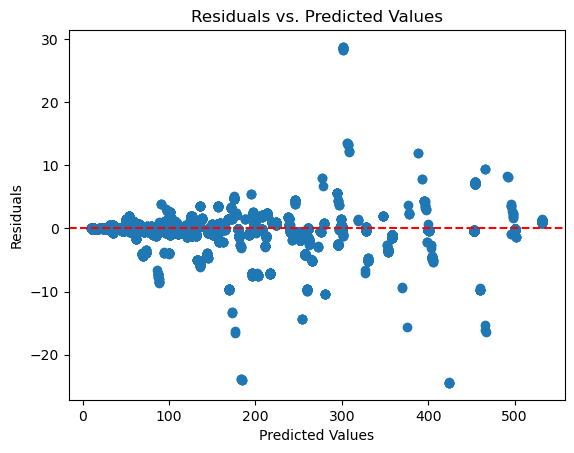

In [23]:
residuals =   y_test - prediction
plt.scatter(prediction, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

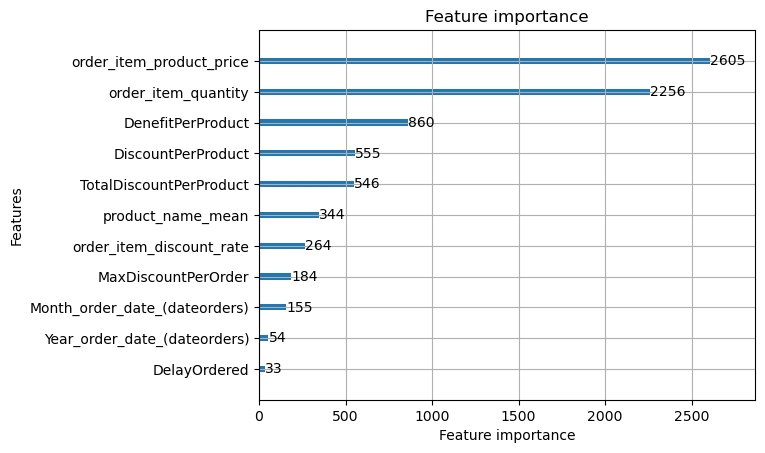

In [24]:
import matplotlib.pyplot as plt
lgb.plot_importance(model_1, max_num_features=20)
plt.show()

# Results Interpertaion

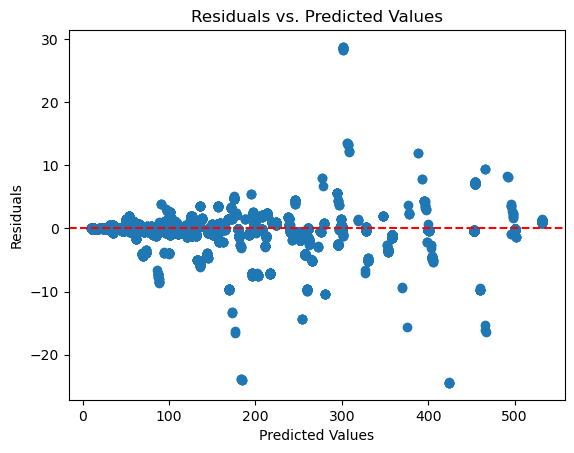

In [25]:
residuals =   y_test - prediction
plt.scatter(prediction, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

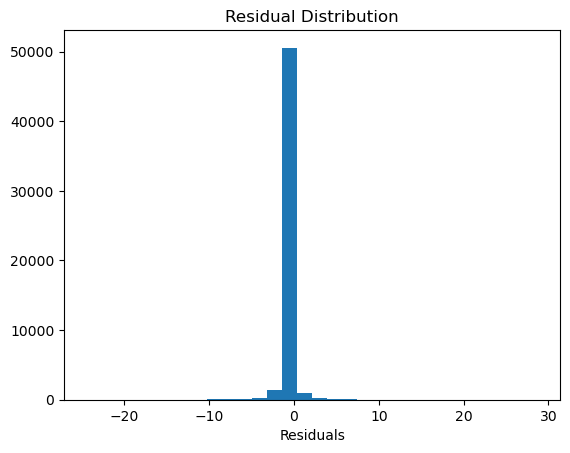

In [26]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

<Axes: ylabel='Density'>

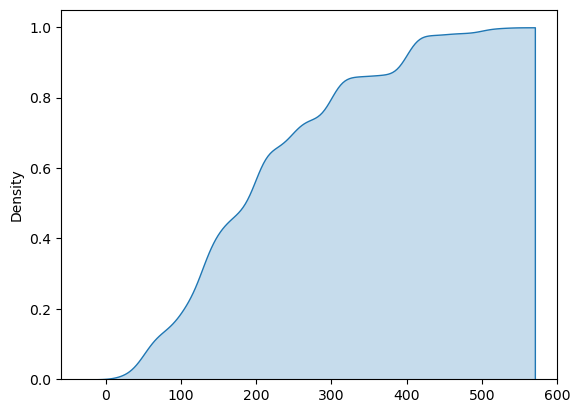

In [27]:
sns.kdeplot(prediction,fill=True,cumulative=True)